In [2]:
import pandas as pd
import csv
from scipy import spatial
import sklearn.manifold as mn
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec

In [17]:
auth  = pd.read_csv('Auth',sep='|',low_memory=False)

In [18]:
auth.head()

,sigID,author
0,1,Lukic M
1,2,Houssin C
2,3,Deharveng L
3,4,Rycerz L
4,5,Ingier-Stocka E


In [19]:
coauthor  = pd.read_csv('/Users/krishna/Dropbox/DMKM/Course/SEM2/DataPreprocessing/ADData/CoAuthors/part-00000',
                        sep=',', header=None)
coauthor[1] =coauthor[1].apply(lambda x : x.split(","))
#coauthor[1] = coauthor[1].apply(lambda y : [x.replace(" ", "").lower() for x in y])

In [20]:
coauthor.head()

,0,1
0,31,"[Petrosyan A, Balogh A, Goldstein ML, Leorat J..."
1,231,"[Lui ATY, Spanswick E, Donovan EF, Liang J, Li..."
2,431,"[Leon JF, Liousse C, Galy-Lacaux C, Doumbia T,..."
3,631,[Lavalle B]
4,831,"[Maillot V, Rossler D]"


In [21]:
min_count = 1
size = 10
window = 5
workers = 8
model = Word2Vec(coauthor[1], min_count=min_count, size=size, window=window,sg=1,workers=workers)

In [22]:
#Cosine Similarity between row0(Lukic M) and row1(Houssin C)
#result = 1 - spatial.distance.cosine(auth['word2vec'][0], auth['word2vec'][1])
#result
#auth.to_csv('word2vec.csv', sep=',')

In [23]:
#model.vocab

In [24]:
labels =[]
tokens = []
for word in model.vocab:
    tokens.append(model[word])
    labels.append(word)

In [25]:
tnse_model = mn.TSNE(perplexity = 10,n_components=2,init='pca',n_iter=200)

In [26]:
new_val = tnse_model.fit_transform(tokens[:30])

In [27]:
x =[]
y = []
for value in new_val:
    x.append(value[0])
    y.append(value[1])

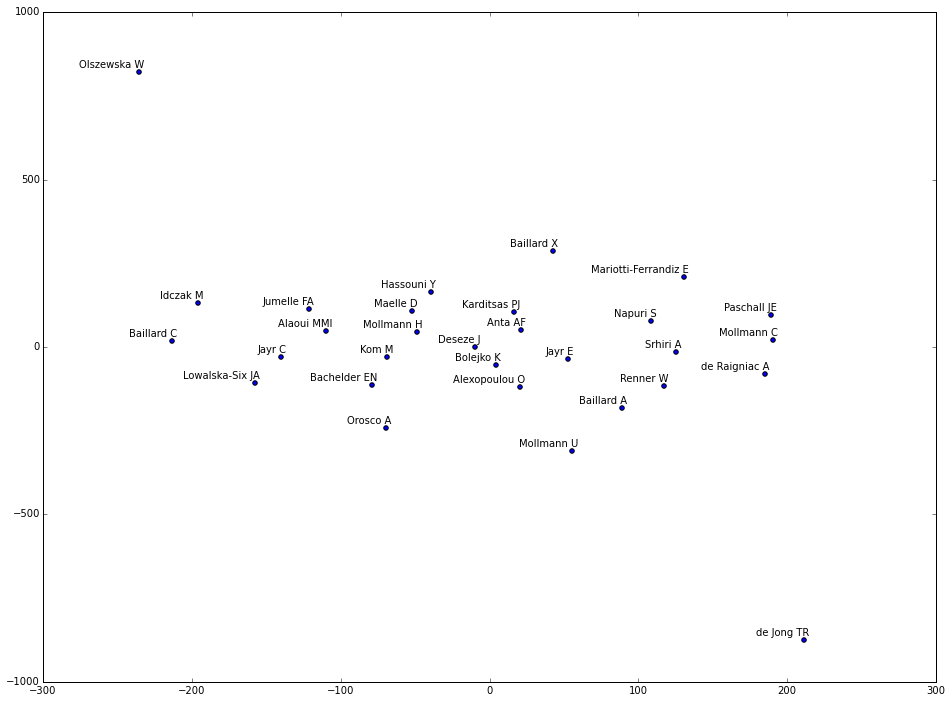

In [30]:
%matplotlib inline
plt.figure(figsize=(16,12))
for i in range(30):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                xy = (x[i],y[i]),
                xytext = (5,2),
                textcoords ='offset points',
                ha = 'right',
                va = 'bottom')
plt.show()